<a href="https://colab.research.google.com/github/emin-ozturk/Python-ML/blob/main/Veri_G%C3%B6rselle%C5%9Ftirme.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

pd.set_option('display.width', 500)

In [36]:
def df_summary(df):
  print("\n#################### HEAD ####################")
  print(df.head())
  print("\n#################### INFO ####################")
  print(df.info())
  print("\n#################### SHAPE ####################")
  print(df.shape)
  print("\n#################### ISNA ####################")
  print(df.isna().sum())
  print("\n#################### DESCRIBE ####################")
  print(df.describe().T)


In [62]:
def grab_col_names(dataframe, cat_th=10,  car_th=20):
  cat_cols = [col for col in df.columns if str(df[col].dtype) in ["category", "object", "bool"]]
  num_but_cat_cols = [col for col in df.columns if df[col].nunique() < cat_th and df[col].dtype in ["int", "float"]]
  cat_but_car_cols = [col for col in df.columns if df[col].nunique() > car_th and str(df[col].dtype) in ["category", "object"]]

  cat_cols += num_but_cat_cols
  cat_cols = [col for col in cat_cols if col not in cat_but_car_cols]

  num_cols = [col for col in df.columns if df[col].dtype in ["int", "float"]]
  num_cols = [col for col in num_cols if col not in cat_cols]

  print(f"Observations: {dataframe.shape[0]}")
  print(f"Variables: {dataframe.shape[1]}")
  print(f'cat_cols: {len(cat_cols)}')
  print(f'num_cols: {len(num_cols)}')
  print(f'cat_but_car_cols: {len(cat_but_car_cols)}')
  print(f'num_but_cat_cols: {len(num_but_cat_cols)}')

  return cat_cols, num_cols, cat_but_car_cols

In [181]:
def cat_summary(df, col, plot = False):
  print(pd.DataFrame(
      {
        col: df[col].value_counts(),
        "Ratio": df[col].value_counts() / len(df) * 100
      }))
  print(f"NaN: {df[col].isna().sum() / df[col].nunique():.3}%")
  if plot:
    plt.figure(figsize = (5, 3))
    sns.countplot(x = df[col], data=df)
    plt.show(block = True)

  print("############################################################\n")


In [193]:
def num_summary(df, col, plot=False):
    quantiles = [0, 0.20, 0.40, 0.50, 0.60, 0.80, 0.90, 1]
    print(df[col].describe(quantiles))

    if plot:
        plt.figure(figsize = (6, 3))
        plt.subplot(1, 2, 1)
        df[col].hist()
        plt.xlabel(col)
        plt.title(col)

        plt.subplot(1, 2, 2)
        sns.scatterplot(df[col])
        plt.show()
    print("############################################################\n")

In [196]:
df = sns.load_dataset("titanic")
df_summary(df)


#################### HEAD ####################
   survived  pclass     sex   age  sibsp  parch     fare embarked  class    who  adult_male deck  embark_town alive  alone
0         0       3    male  22.0      1      0   7.2500        S  Third    man        True  NaN  Southampton    no  False
1         1       1  female  38.0      1      0  71.2833        C  First  woman       False    C    Cherbourg   yes  False
2         1       3  female  26.0      0      0   7.9250        S  Third  woman       False  NaN  Southampton   yes   True
3         1       1  female  35.0      1      0  53.1000        S  First  woman       False    C  Southampton   yes  False
4         0       3    male  35.0      0      0   8.0500        S  Third    man        True  NaN  Southampton    no   True

#################### INFO ####################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       

In [63]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 891
Variables: 15
cat_cols: 13
num_cols: 2
cat_but_car_cols: 0
num_but_cat_cols: 4


        sex      Ratio
male    577  64.758698
female  314  35.241302
NaN: 0.0%


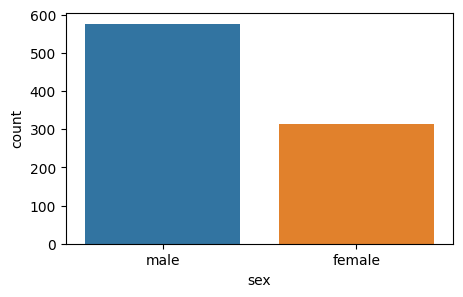

############################################################

   embarked      Ratio
S       644  72.278339
C       168  18.855219
Q        77   8.641975
NaN: 0.667%


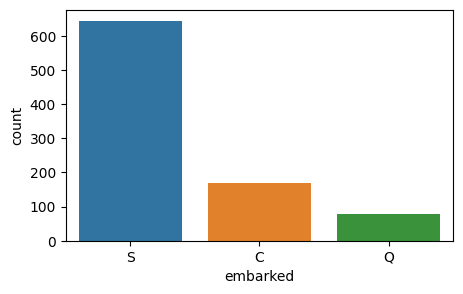

############################################################

        class      Ratio
Third     491  55.106622
First     216  24.242424
Second    184  20.650954
NaN: 0.0%


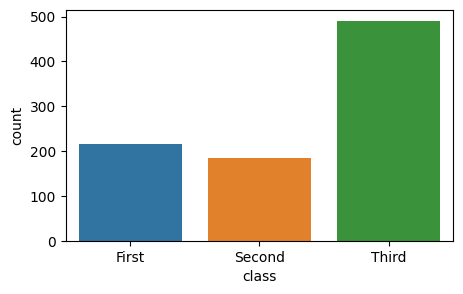

############################################################

       who      Ratio
man    537  60.269360
woman  271  30.415264
child   83   9.315376
NaN: 0.0%


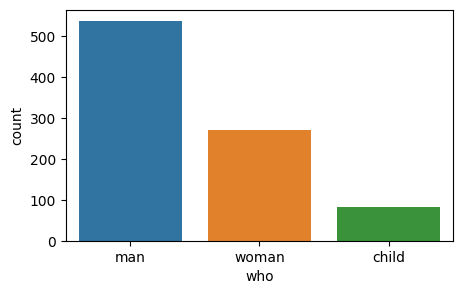

############################################################

   adult_male     Ratio
1         537  60.26936
0         354  39.73064
NaN: 0.0%


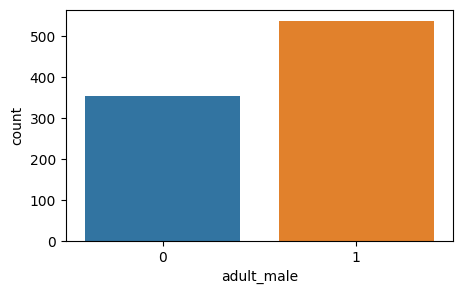

############################################################

   deck     Ratio
C    59  6.621773
B    47  5.274972
D    33  3.703704
E    32  3.591470
A    15  1.683502
F    13  1.459035
G     4  0.448934
NaN: 98.3%


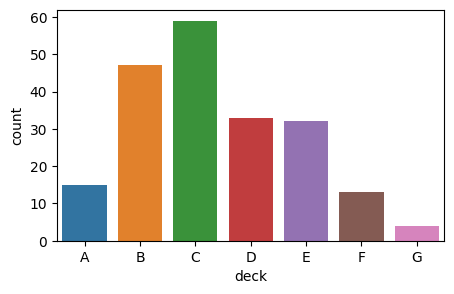

############################################################

             embark_town      Ratio
Southampton          644  72.278339
Cherbourg            168  18.855219
Queenstown            77   8.641975
NaN: 0.667%


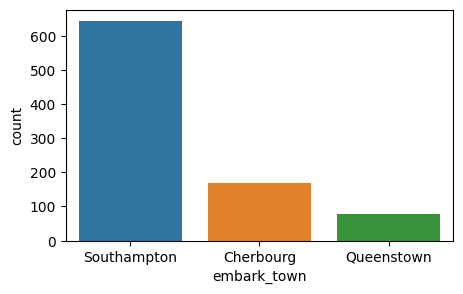

############################################################

     alive      Ratio
no     549  61.616162
yes    342  38.383838
NaN: 0.0%


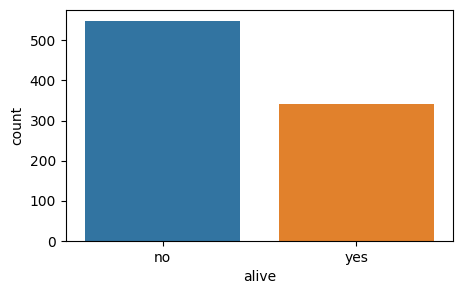

############################################################

   alone     Ratio
1    537  60.26936
0    354  39.73064
NaN: 0.0%


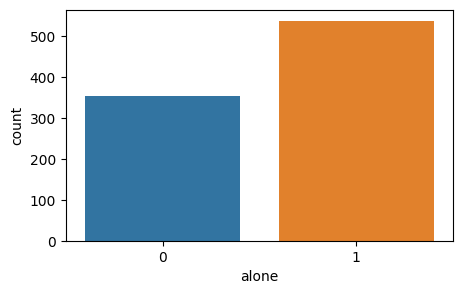

############################################################

   survived      Ratio
0       549  61.616162
1       342  38.383838
NaN: 0.0%


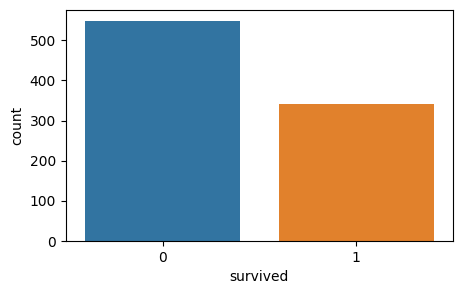

############################################################

   pclass      Ratio
3     491  55.106622
1     216  24.242424
2     184  20.650954
NaN: 0.0%


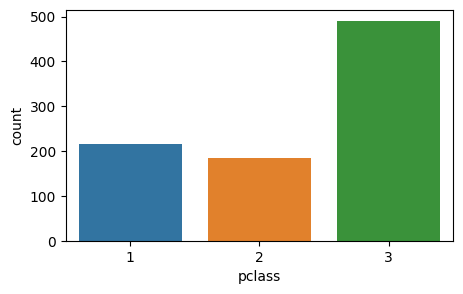

############################################################

   sibsp      Ratio
0    608  68.237935
1    209  23.456790
2     28   3.142536
4     18   2.020202
3     16   1.795735
8      7   0.785634
5      5   0.561167
NaN: 0.0%


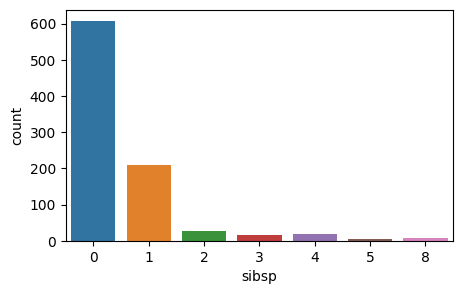

############################################################

   parch      Ratio
0    678  76.094276
1    118  13.243547
2     80   8.978676
5      5   0.561167
3      5   0.561167
4      4   0.448934
6      1   0.112233
NaN: 0.0%


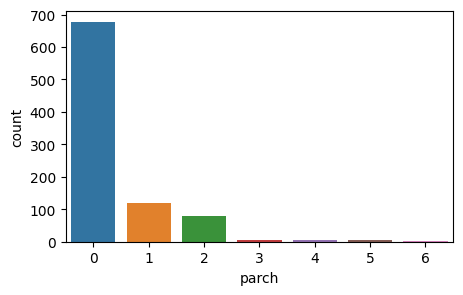

############################################################



In [195]:
for col in cat_cols:
  if df[col].dtype == "bool":
    df[col] = df[col].astype(int)
  cat_summary(df, col, plot = True)

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
0%         0.420000
20%       19.000000
40%       25.000000
50%       28.000000
60%       31.800000
80%       41.000000
90%       50.000000
100%      80.000000
max       80.000000
Name: age, dtype: float64


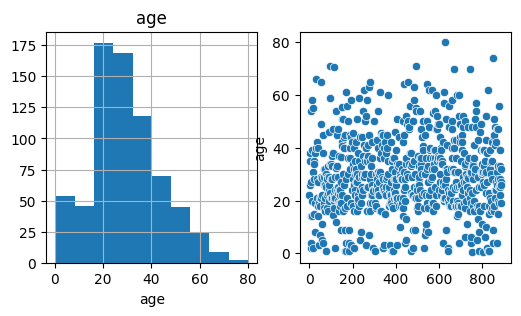

############################################################

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
0%         0.000000
20%        7.854200
40%       10.500000
50%       14.454200
60%       21.679200
80%       39.687500
90%       77.958300
100%     512.329200
max      512.329200
Name: fare, dtype: float64


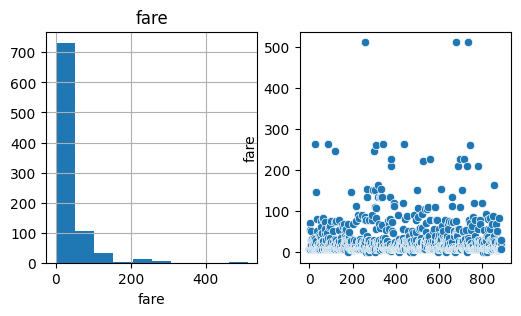

############################################################



In [194]:
for col in num_cols:
  num_summary(df, col, plot = True)